In [1]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.6.0


In [4]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [5]:
dataset = raw_dataset.copy()
dataset.tail()
dataset = dataset.dropna()

In [6]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [8]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [10]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())


[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


In [11]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


In [13]:
horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

In [14]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [16]:
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [17]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 2.19 s, sys: 370 ms, total: 2.57 s
Wall time: 1.99 s


In [18]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.804043,4.189397,95
96,3.805872,4.183249,96
97,3.802624,4.182348,97
98,3.803858,4.190848,98
99,3.804562,4.194671,99


In [20]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

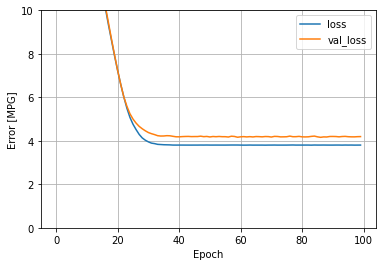

In [21]:
plot_loss(history)

In [19]:
horsepower_model.predict(horsepower[:10])


array([[27.532],
       [25.359],
       [13.326],
       [29.537],
       [28.869],
       [25.025],
       [30.039],
       [28.869],
       [24.189],
       [25.359]], dtype=float32)

In [79]:
t1 = nr.rand(5,3)
t2 = nr.rand(2,3)

In [96]:
t1.shape

(5, 3)

In [99]:
hmm.shape

(5, 5)

In [98]:
hmm = np.cov(t1)

In [69]:
dist = np.zeros((5,2))

In [70]:
dist

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [61]:
for i in range(2):
    dist[i] = np.linalg.norm(t1 - t2[i],axis=1)

In [82]:
dist[:,0] = np.linalg.norm(t1 - t2[0],axis=1)
dist[:,1] = np.linalg.norm(t1 - t2[1],axis=1)
hmm = np.argmin(dist,axis=1)

In [86]:
np.where(hmm==0)

(array([1, 2, 3]),)

In [88]:
t1[hmm == 0].mean(axis=1)

array([0.36028801, 0.55901113, 0.77288412])

In [94]:
dist

array([[0.84289622, 0.76949306],
       [0.50452201, 0.51813195],
       [0.49981997, 0.96867419],
       [0.51389211, 0.91789746],
       [0.75026676, 0.36850721]])

In [93]:
np.sqrt(np.square(t1 - t2[0]).sum(axis=1))

array([0.84289622, 0.50452201, 0.49981997, 0.51389211, 0.75026676])

In [20]:
np.linalg.norm(t1 - t1[0],axis=1).reshape(-1,1)

array([[0.        ],
       [1.70736633],
       [1.31328192],
       [0.98277899],
       [1.35942424],
       [1.14861361],
       [1.11491718],
       [1.04960183],
       [1.20579297],
       [1.07435252],
       [1.19280307],
       [0.98202243],
       [1.34355817],
       [1.34380484],
       [1.09653094],
       [0.99673973],
       [1.56906858],
       [0.90166941],
       [1.17007643],
       [1.16162923],
       [1.43552335],
       [0.92670775],
       [1.28685216],
       [1.17973593],
       [1.24729592],
       [1.202749  ],
       [1.22231426],
       [1.35286656],
       [1.52617717],
       [1.27878347]])

In [30]:
t1-t1[0]

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.38495532, -0.74057591, -0.02251249],
       [ 0.69029364,  0.11540341, -0.31545204],
       [ 0.21031743, -0.36017386, -0.15417253],
       [ 0.10263606, -0.64067664, -0.44803921]])

In [26]:
t1[..., np.newaxis] - t1[np.newaxis, ...] 

ValueError: operands could not be broadcast together with shapes (30,10,1) (1,30,10) 

In [42]:
np.linalg.norm(t1 - t1[0],axis=1)

array([0.        , 0.83495515, 0.76768043, 0.44466594, 0.78850482])

In [49]:
dist[

array([[0.        , 0.83495515, 0.76768043, 0.44466594, 0.78850482],
       [0.83495515, 0.        , 0.95485374, 0.43879207, 0.52034318],
       [0.76768043, 0.95485374, 0.        , 0.69466681, 0.96673566],
       [0.44466594, 0.43879207, 0.69466681, 0.        , 0.42027933],
       [0.78850482, 0.52034318, 0.96673566, 0.42027933, 0.        ]])

In [6]:
hh = np.ones(3)
hh[:]=2

In [7]:
hh
hh

array([2., 2., 2.])

In [10]:
jk = nr.uniform(size=(2,3))

In [13]:
jk[-1,:] =0

In [14]:
jk

array([[0.89274348, 0.93979327, 0.55417182],
       [0.        , 0.        , 0.        ]])

In [15]:
max([1,2,3])

3

In [149]:
class learner():

    def __init__(self,run=3000,ph=0.25,gamma=1):
        self.end_state= 100
        self.ph = ph 
        self.runs = run
        self.gamma = gamma
        #self.value_s = nr.uniform(size=(self.end_state+1,self.runs))
        self.value_s = np.zeros((self.end_state+1,self.runs))
        self.value_s[0,:] =0 
        self.value_s[-1,:] =0
        self.reward = np.zeros(self.end_state+1)
        self.reward[self.end_state] =1

    def random_policy(self,st):
        cr = np.ones(min(st+1,self.end_state-st+1))
        cr[:] = 1/(len(cr)*1.0)
        return cr
    
    def value_iteration(self):
        delta = 0
        value_s = np.zeros((self.end_state+1,self.runs))
 
        for rn in range(self.runs):
            for st in range(1,self.end_state-1):
                old_v = self.value_s[st,rn]
                rar = []
                for act in range(1,min(st,100-st)+1):
                    minus = (1-self.ph)*(self.reward[st-act] +self.gamma*self.value_s[st-act,rn])
                    plus = (self.ph)*(self.reward[st+act] +self.gamma*self.value_s[st+act,rn])
                    rar.append(minus+plus)
                curr_v = max(rar)
                delta_last = delta
#                 print(delta_last,abs(old_v-curr_v))
                delta = max(delta_last,abs(old_v-curr_v))
                self.value_s[st,rn] = curr_v
            
        return delta,self.value_s
    
    
    def optimal_v(self):
        pi=np.zeros(self.end_state)
        for st in range(1,self.end_state-1):
            rar=[]
            hah = min(st,100-st)
            for act in range(1,hah+1):
                minus = (1-self.ph)*(self.reward[st-act] +self.gamma*self.value_s[st-act,self.runs-1])
                plus = (self.ph)*(self.reward[st+act] +self.gamma*self.value_s[st+act,self.runs-1])
                rar.append(minus+plus)
            pi[st] = np.argmax(rar)+1
        return pi
    
#     def value_iteration(self):
#         delta = [0]
#         value_s = nr.uniform(size=self.end_state+1)
# #        value_s = np.ones(self.end_state+1)
#         value_s[0] =0 
#         value_s[-1] =0 
#         for rn in range(1,self.runs):
#             for st in range(1,self.end_state-1):
#                 old_v = value_s[st]
#                 pias = self.random_policy(st)
#                 curr_v =0
#                 reward_minus = 0
#                 reward_plus = 0
#                 rar = []
#                 for act in range(len(pias)):
#                     reward_minus =  1 if st-act >= self.end_state else 0
#                     reward_plus =  1 if st+act >= self.end_state else 0
#                     rar.append((self.ph*(reward_minus +self.gamma*value_s[st-act]) \
#                                    + (1-self.ph)*(reward_plus+self.gamma*value_s[st+act])))
#                 curr_v = max(rar)
#                 delta_last = delta[-1]
#                 print(delta_last,abs(old_v-curr_v))
#                 delta.append(max(delta_last,abs(old_v-curr_v)))
#                 value_s[st] = curr_v
            
#         return delta,value_s
        
def value_iteration():
    qt = learner()
    yak =qt.value_iteration()
    yuy = qt.optimal_v()
    return yak,yuy

tat = value_iteration()


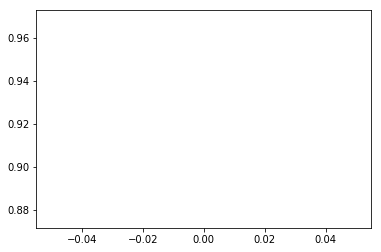

In [140]:
plt.plot(tat[0][0],'r-')


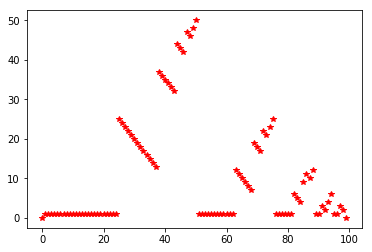

In [150]:
plt.plot(tat[1],'r*')

<BarContainer object of 100 artists>

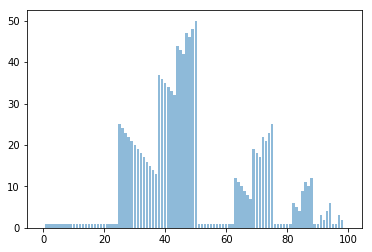

In [151]:
plt.bar(range(100), tat[1], align='center', alpha=0.5)

In [137]:
tat[0][0]

0.9222400000000001

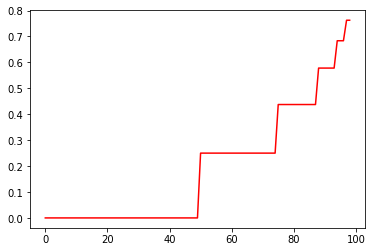

In [152]:
plt.plot(tat[0][1][:99,2999],'r-')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:95: RuntimeWarning: invalid value encountered in true_divide


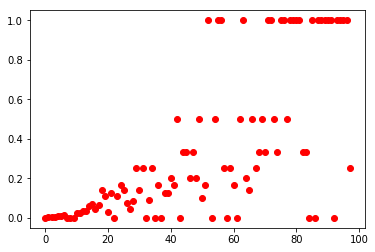

In [95]:
class learner():

    def __init__(self,run=1000,capital=300,ph=0.4,gamma=0.3):
        self.capital = capital
        self.max_state = 200
        self.end_state= 100
        self.ph = ph 
        self.runs = run
        self.gamma = gamma
        self.transition_matrix = np.zeros((self.max_state,self.max_state))
        self.value_func = np.zeros((self.max_state,self.max_state))
        self.q_func= np.zeros(self.max_state)
        self.round_action = np.zeros(2*min(self.capital,self.max_state-self.capital))
        self.reward_list = np.zeros(run)
        self.chosen_action = np.zeros(run)
        self.chosen_state = np.zeros(run)
        self.chosen_state[0]
        self.action_list = range(0,min(self.capital,self.max_state-self.capital))
        self.chosen_state[0] = self.capital
        
        self.value_s = np.zeros(self.max_state)
        
        self.state_reward = np.zeros(self.capital)
        self.state_num_rounds = np.zeros(self.capital)
        return

    def update_q(self,action,current_reward,current_round):
        current_v = q_func[action]
        action_n = self.round_action[action]    
        reward_sample[action,int(action_n)-1] = current_reward
        reward_list[current_round] = current_reward
        q_func[action] += (current_reward-current_v)/(action_n*1.0)
        return
    
    def update_v(self,state,current_reward):
        self.state_reward[state] += current_reward
        self.state_num_rounds[state] += 1

        return

    def get_transition_matrix(self):
        return self.transition_matrix
    
    def get_v(self):
        return self.state_reward, self.state_num_rounds
    
    def random_policy(st):
        cr = np.ones(st)
        cr[:] = 1/(st*1.0)
        return cr
    
    def value_iteration(self):
        delta = [0]
        value_s = np.zeros((self.end_state,runs))
        for rn in range(1,self.runs):
            for st in range(self.end_state):
                old_v = value_s[st,rn-1]
                pias = self.random_policy(st)
                curr_v =0 
                for act in range(st):
                    reward_minus =  1 if st-act >= self.end_state else 0
                    reward_plus =  1 if st+act >= self.end_state else 0
                    curr_v =+ pias*(self.ph*(reward_minus +self.gamma*value_s[st-act,rn-1]) \
                                    + (1-self.ph)*(reward_plus+self.gamma*value_s[st+act,rn-1]))
        
                delta.append(np.max(delta[-1],abs(curr_v - old_v)))
                value_s[st,rn] = curr_v
            
        return delta,value_s
    
    
    def choose_action_random(self,current_round, eps):
        rn = nr.binomial(1,eps)
        pp = nr.choice(self.action_list)
        if rn > 0: 
            
            i = int(self.chosen_state[current_round-1])
            j = self.max_state if int(self.chosen_state[current_round-1]+pp) > self.max_state else int(self.chosen_state[current_round-1]+pp)
            #print(i,j,pp)
            self.transition_matrix[i][j] += 1
            
            self.chosen_action[current_round] = pp
            self.round_action[pp] += 1

            self.chosen_state[current_round] = self.max_state if int(self.chosen_state[current_round-1]+pp) > self.max_state else int(self.chosen_state[current_round-1]+pp)
            return self.chosen_state[current_round]
        else:
            i = int(self.chosen_state[current_round-1])
            j = 0 if int(self.chosen_state[current_round-1]-pp) <0 else int(self.chosen_state[current_round-1]-pp)
            #print(i,j,pp)
            self.transition_matrix[i][j] += 1
            self.chosen_action[current_round] = -pp
            self.round_action[-pp] += 1

            self.chosen_state[current_round] = 0 if int(self.chosen_state[current_round-1]-pp) <0 else int(self.chosen_state[current_round-1]-pp)
            #print(self.chosen_state)
            return self.chosen_state[current_round]
        
def value_iteration():
    
    state_reward = np.zeros(99)
    state_num_rounds = np.zeros(99)
    
   
    for st in range(1,99):
        qt = learner(run,st)
        
        for rd in range(1,run):

            a = qt.choose_action_random(rd,epsilon)
            reward = 0 if a <100 else 1
            state_reward[st] += reward
            state_num_rounds[st] += 1
            
            if a >99 or a < 1:
                #print(qt.get_transition_matrix())
                break

        #print(qt.get_transition_matrix())
    return state_reward, state_num_rounds        
    
def epsilon_greedy_agent(epsilon = 0.7,run=10):
    
    state_reward = np.zeros(99)
    state_num_rounds = np.zeros(99)
    
   
    for st in range(1,99):
        qt = learner(run,st)
        
        for rd in range(1,run):

            a = qt.choose_action_random(rd,epsilon)
            reward = 0 if a <100 else 1
            state_reward[st] += reward
            state_num_rounds[st] += 1
            
            if a >99 or a < 1:
                #print(qt.get_transition_matrix())
                break

        #print(qt.get_transition_matrix())
    return state_reward, state_num_rounds

x,y = epsilon_greedy_agent(epsilon = 0.7,run=1000)
plt.plot((x/y)[1:],'ro')

In [94]:
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.])

In [93]:
y

array([  0., 999.,   2.,   8.,   3.,   8.,   5.,   4.,   8.,  13.,   4.,
         8.,   4.,   5.,  11.,  43.,  11.,   2.,  26.,  15.,   2.,   3.,
        19.,  46.,  21.,   6.,  16.,   9.,  32.,  11.,  12.,   5.,  13.,
         4.,   8.,   4.,   3.,   8.,   7.,   7.,   4.,   4.,  28.,  11.,
         3.,  18.,   8.,   5.,   6.,   5.,   5.,   7.,   5.,  13.,  15.,
         2.,   5.,   7.,   2.,   2.,   5.,   2.,   2.,   3.,   4.,   5.,
         2.,   2.,   7.,   9.,   3.,   1.,   2.,   1.,   5.,   5.,   3.,
         1.,   4.,   1.,   4.,   1.,   1.,   2.,   2.,   6.,   1.,   2.,
         1.,   1.,   6.,   2.,   1.,   1.,   7.,   1.,   1.,   3.,   1.])

In [46]:
np.set_printoptions(threshold=np.inf)